In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [16, 6]

# Brownian motion, squared

We know that if $B(t)$ is standard Brownian motion,
then since $df(B) = f'(B)dB + f''(B)dt$, with $f(x) = x^2$ we have that
$$  dB(t)^2 = 2 B(t) dB(t) + t , $$
and so if $X(t) = B(t)^2$ then with $B(0) = 0$,
$$\begin{aligned}
  X(t) &= \int_0^t 2B(s) dB(s) + t \\
      &= \int_0^t 2\sqrt{X(s)} dB(s) + t .
\end{aligned}$$
We'll simulate $B(t)^2$ in these three ways.

In [87]:
# method one: X(t) = B(t)^2
B0 = 2.0
dt = 0.01
T = 5.0
N = int(T / dt)
dB = np.concatenate([[0.0], np.random.normal(size=N, scale=np.sqrt(dt))])
# this makes dB[j] = B[j] - B[j-1] for j > 0
B = B0 + np.cumsum(dB)
t = np.linspace(0, T, N+1)
assert(B.shape[0] == dB.shape[0])
assert(abs(dB[12] - (B[12] - B[11])) < 1e-14)

In [88]:
# method 2: dX = 2 B dB + dt

# X = np.cumsum(2 * B * dB) + t
X = np.zeros(B.shape[0])
X[0] = B0 * B0
for j in range(1, len(X)):
    X[j] = X[j-1] + 2 * B[j-1] * dB[j] + dt


/home/peter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


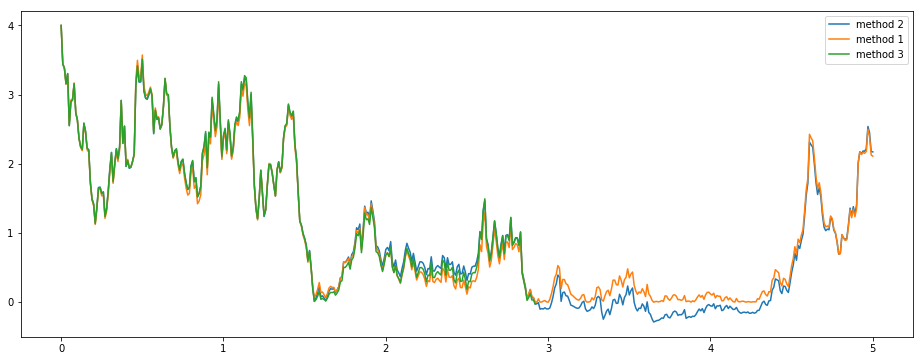

In [89]:
# method 3: dX = 2 sqrt(X) dB + dt

XX = np.zeros(B.shape[0])
XX[0] = B0*B0
for j in range(1, len(XX)):
    XX[j] = XX[j-1] + 2 * np.sqrt(XX[j-1]) * dB[j] + dt

        
fig, ax = plt.subplots()
ax.plot(t, X, label='method 2')
ax.plot(t, B*B, label='method 1')
ax.plot(t, XX, label='method 3')

ax.legend()

# A 2D diffusion

Let's simulate a diffusion in 2D,
$$\begin{aligned}
    dX(t) &= dB_1(t) + (- a X(t) - Y(t))dt \\
    dY(t) &= dB_2(t) + (- a Y(t) + X(t))dt
\end{aligned}$$
where $B_1$ and $B_2$ are independent Brownian motions.
This should act like 2d Brownian motion that is attracted to the origin
but in a spiral-ish way.

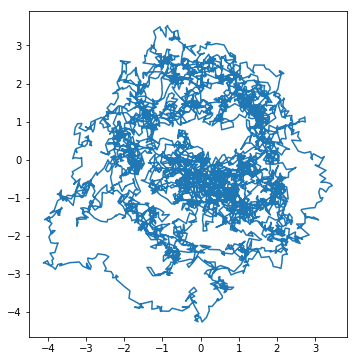

In [95]:
Binit = (2.0, 0.0)
a = 0.1
dt = 0.01
T = 50.0
N = int(T / dt)
dB1 = np.concatenate([[0.0], np.random.normal(size=N, scale=np.sqrt(dt))])
dB2 = np.concatenate([[0.0], np.random.normal(size=N, scale=np.sqrt(dt))])
X = np.zeros(N)
Y = np.zeros(N)
X[0], Y[0] = Binit
for j in range(1, N):
    X[j] = X[j-1] + dB1[j] + (-a * X[j-1] - Y[j-1]) * dt
    Y[j] = Y[j-1] + dB2[j] + (-a * Y[j-1] + X[j-1]) * dt

fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set_aspect(1)